# Data Importing:

In [8]:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("/content/drive/MyDrive/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [16]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Exploratory Data Analysis:

In [14]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [20]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

# Treat the Missing Values:

In [21]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [23]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [24]:
df['occupation'].replace('?',np.NaN,inplace=True)
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [25]:
df.shape

(48842, 15)

In [26]:
df['workclass'].replace('?',np.NaN,inplace=True)
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [27]:
df['native-country'].replace('?',np.NaN,inplace=True)
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [28]:
df['workclass'].mode()

0    Private
dtype: object

In [29]:
df['native-country'].mode()

0    United-States
dtype: object

In [30]:
df['occupation'].mode()

0    Prof-specialty
dtype: object

In [31]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [32]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [33]:
x=df.mean()
x

age                    38.643585
fnlwgt             189664.134597
educational-num        10.078089
capital-gain         1079.067626
capital-loss           87.502314
hours-per-week         40.422382
dtype: float64

In [34]:
df.median()

age                    37.0
fnlwgt             178144.5
educational-num        10.0
capital-gain            0.0
capital-loss            0.0
hours-per-week         40.0
dtype: float64

In [35]:
df.mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


# Treat the Outliers: 

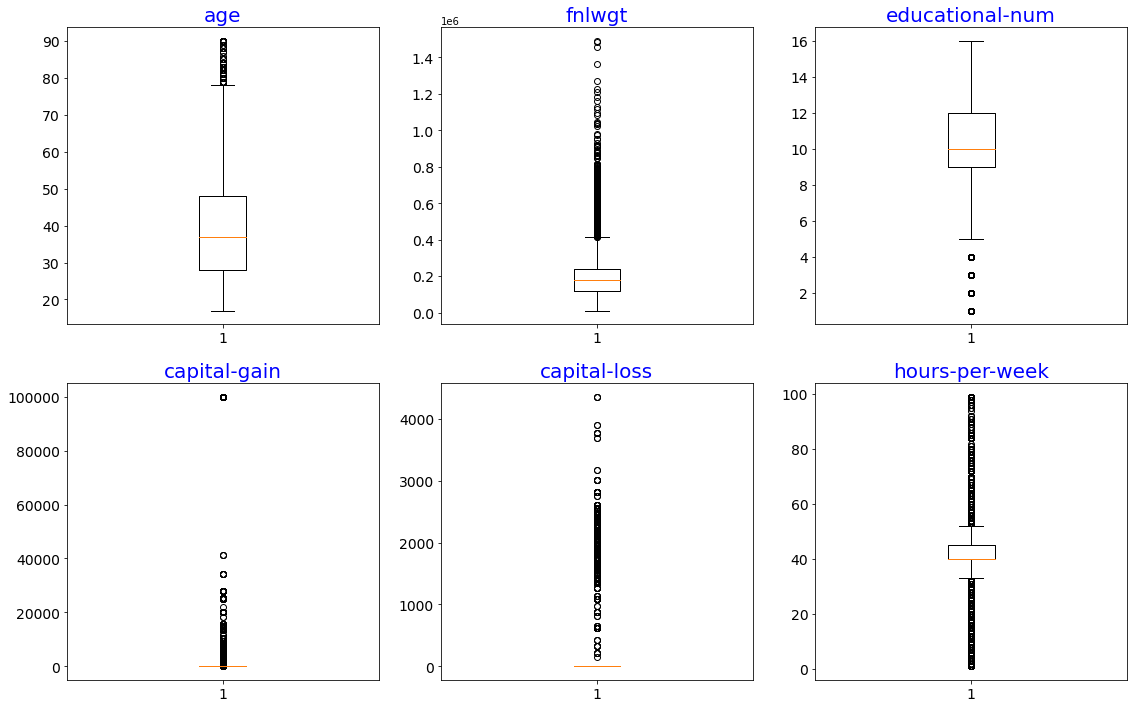

In [38]:
plt.figure(figsize=(19,12))


num_feat = df.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_feat[i]])
    plt.title(num_feat[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

In [39]:
lower_bound =0.1
upper_bound=0.95
res = df.quantile([lower_bound,upper_bound])
res

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0.10,22.0,65738.20,7.0,0.0,0.0,24.0
0.95,63.0,379481.65,14.0,5013.0,0.0,60.0


# Winsorizing:

1.Analyze your data to make sure the outlier isn’t a result of measurement error or some other fixable error.

2.Decide how much Winsorization you want. This is specified as a total percentage of untouched data. For example, if you want to Winsorize the top 5% and bottom 5% of data points, this is equal to 100% – 5% – 5% = 90% Winsorization. A 80% Winsorization means that 10% is modified from each tail area (see Tips on Cut-Off Point Selection below).

3.Replace the extreme values by the maximum and/or minimum values at the threshold

In [42]:
from scipy.stats.mstats import winsorize
df["age"]           = winsorize(df["age"],(0,0.10))
df["fnlwgt"]        = winsorize(df["fnlwgt"],(0,0.10))
df["educational-num"]  = winsorize(df["educational-num"],(0,0.099))
df["capital-gain"]  = winsorize(df["capital-gain"],(0,0.099))
df["capital-loss"]  = winsorize(df["capital-loss"],(0,0.099))
df["hours-per-week"]= winsorize(df["hours-per-week"],(0.10,0.20))

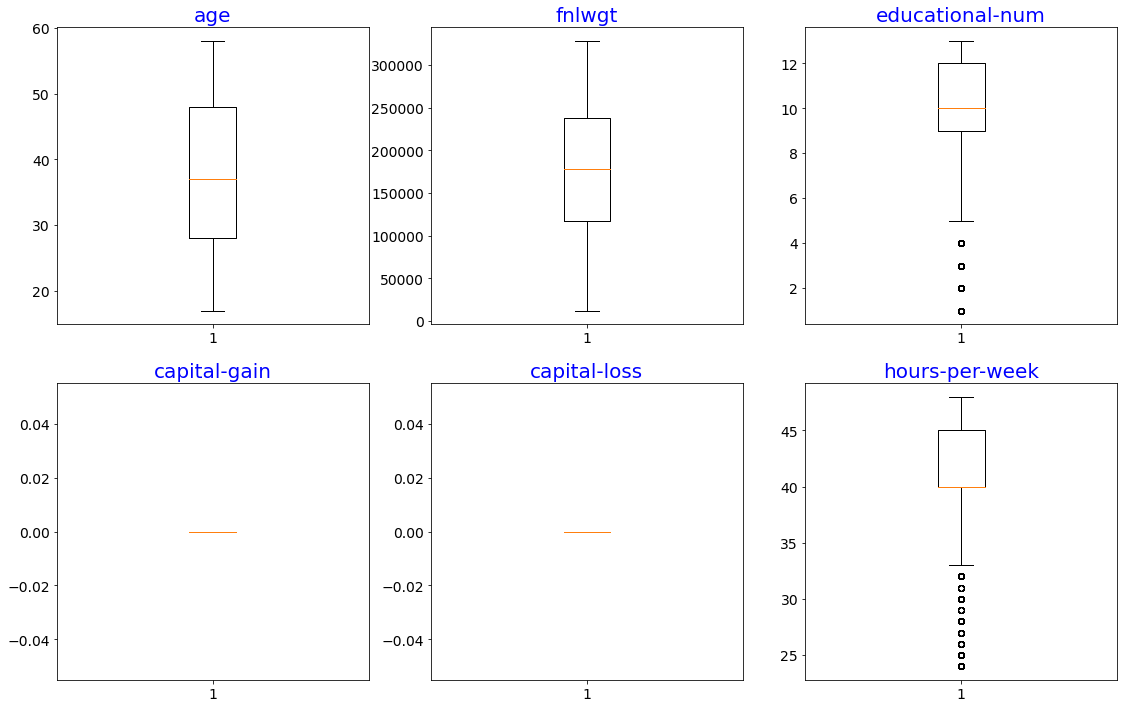

In [43]:
plt.figure(figsize=(19,12))


num_feat = df.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_feat[i]])
    plt.title(num_feat[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

# Z-score:

A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score

![image.png](attachment:image.png)


Z	=	standard score

x	=	observed value

$\mu$	=	mean of the sample

$ \sigma$	=	standard deviation of the sample

In [45]:
y=df.std()
y

age                   12.275084
fnlwgt             84930.006592
educational-num        2.373058
capital-gain           0.000000
capital-loss           0.000000
hours-per-week         7.184808
dtype: float64

In [46]:
dfz=(df-x)/y
dfz

,age,capital-gain,capital-loss,education,educational-num,fnlwgt,gender,hours-per-week,income,marital-status,native-country,occupation,race,relationship,workclass
0,-1.111486,-inf,-inf,NaN,-1.297098,0.437276,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.052430,-inf,-inf,NaN,-0.454304,-1.175676,NaN,1.054672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.867089,-inf,-inf,NaN,0.809888,1.634309,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.436365,-inf,-inf,NaN,-0.032906,-0.345474,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.681747,-inf,-inf,NaN,-0.032906,-1.014566,NaN,-1.450614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.948554,-inf,-inf,NaN,0.809888,0.796395,NaN,-0.337153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48838,0.110501,-inf,-inf,NaN,-0.454304,-0.415520,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48839,1.576886,-inf,-inf,NaN,-0.454304,-0.444532,NaN,-0.058788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48840,-1.355884,-inf,-inf,NaN,-0.454304,0.139242,NaN,-2.285709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
num_var=[]
cat_var=[]
for i in df.columns:
    if (df[i].dtypes=='object'):
        cat_var.append(i)
    else:
        num_var.append(i)

In [49]:
num_var

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [50]:
cat_var

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

# Univariate Analysis:

## Histograms

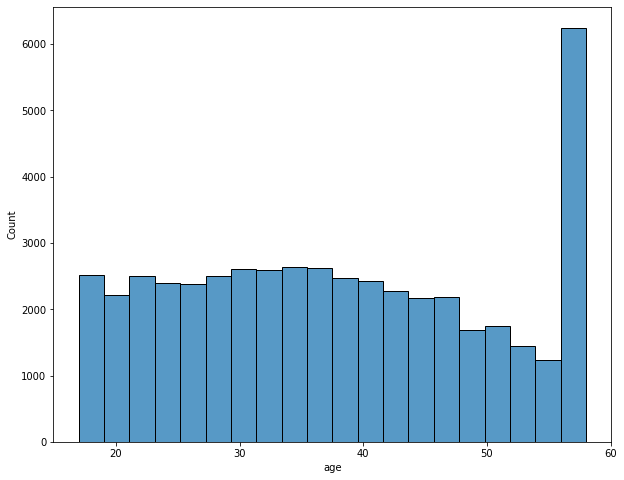

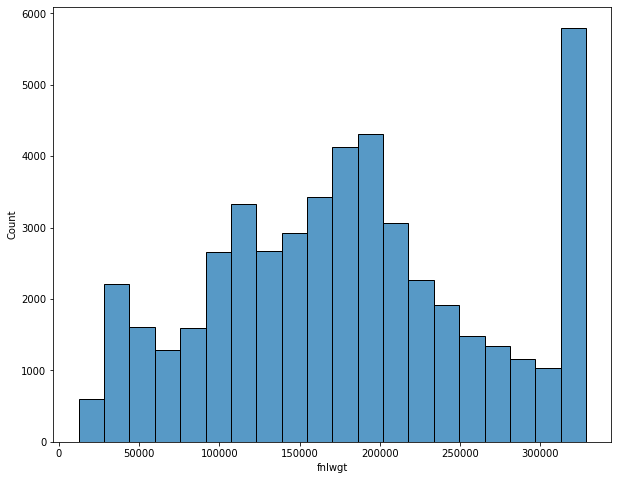

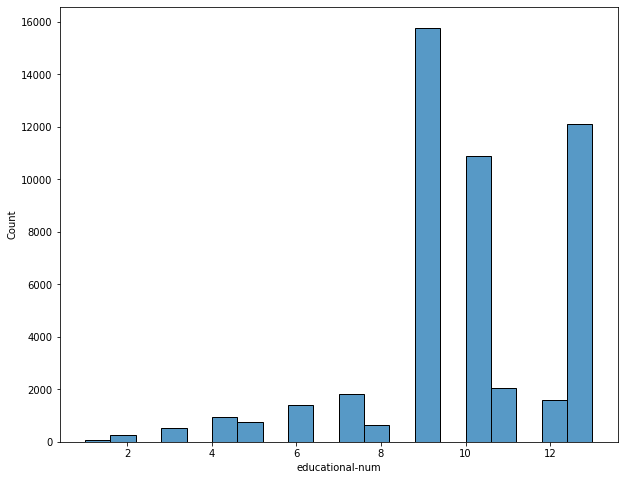

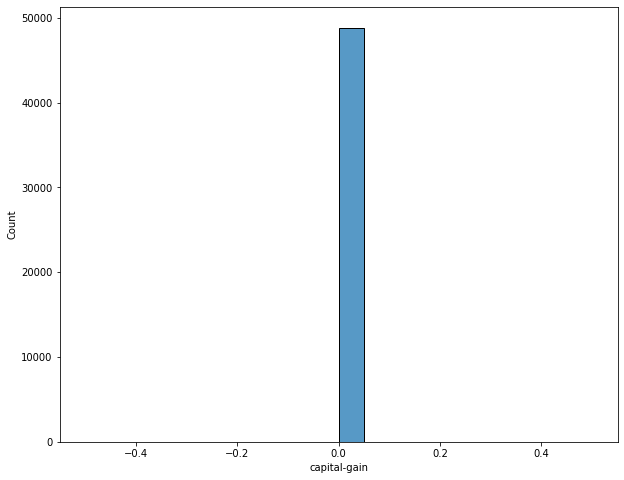

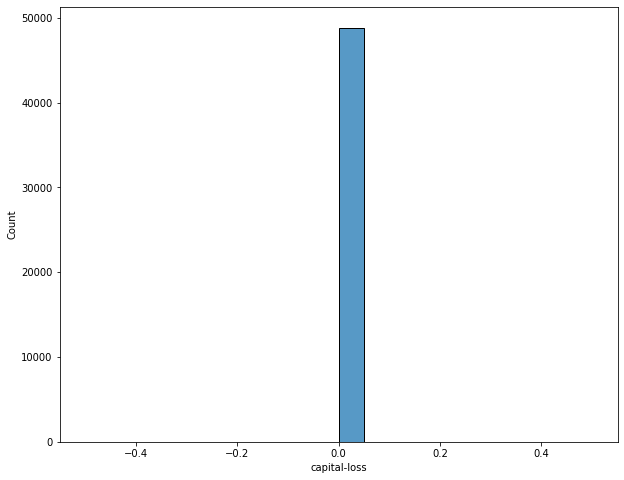

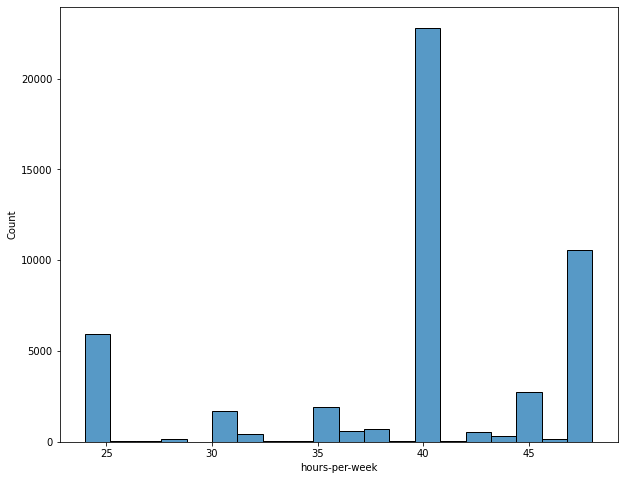

In [51]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.histplot(df[i],kde=False,bins=20)

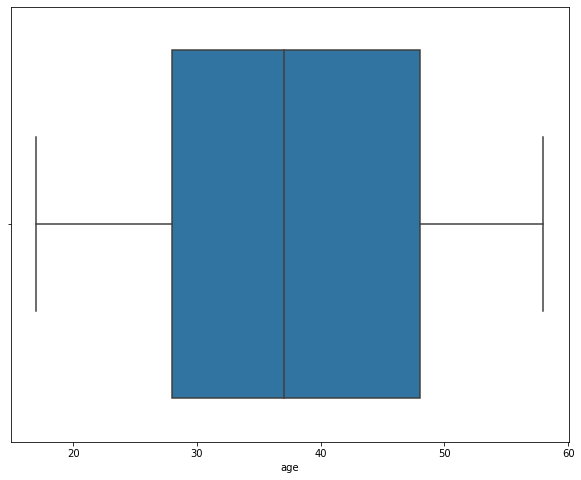

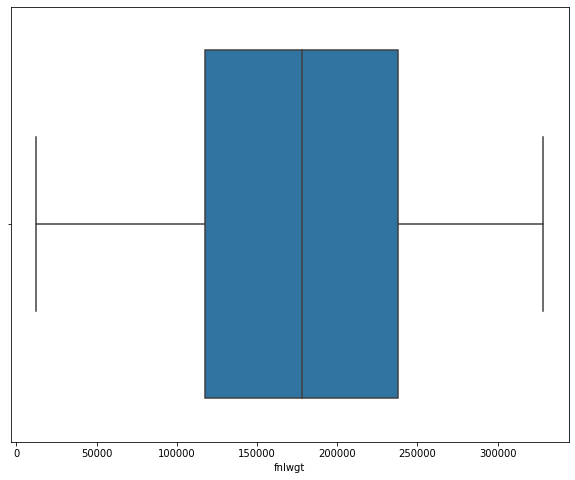

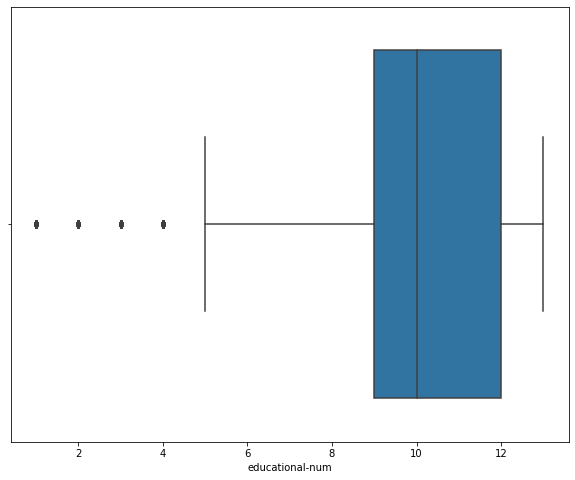

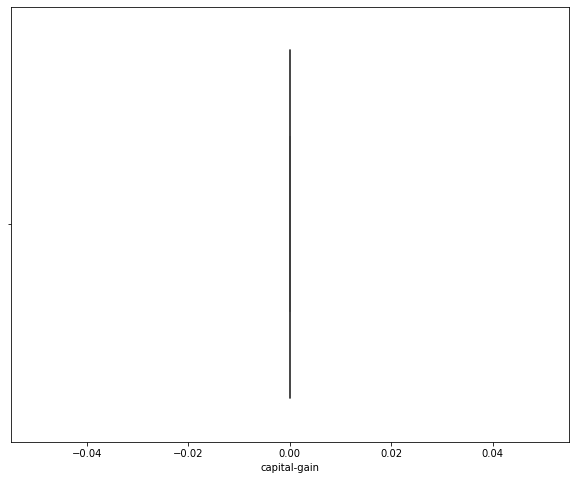

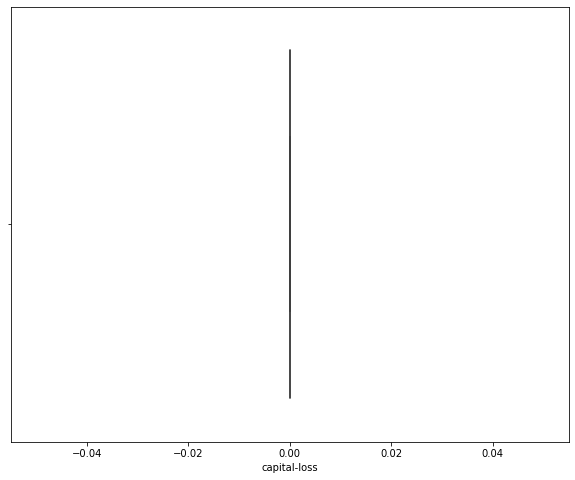

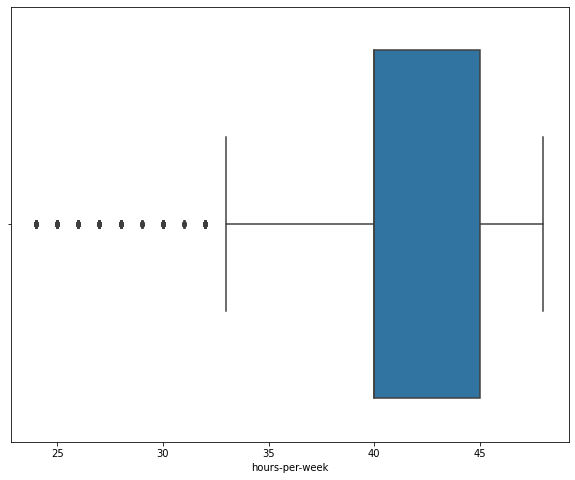

In [52]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.boxplot(df[i])

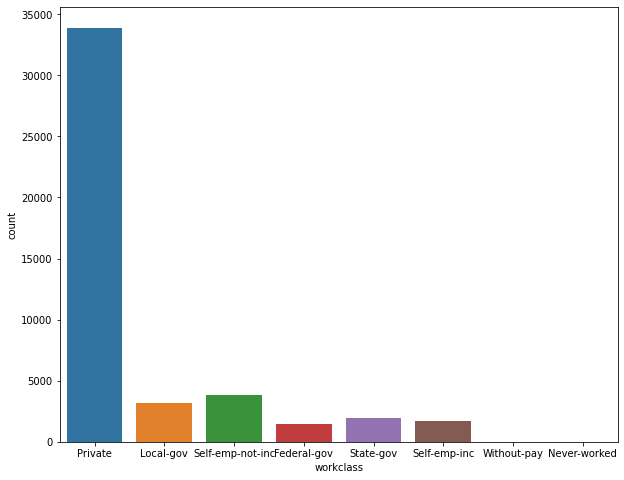

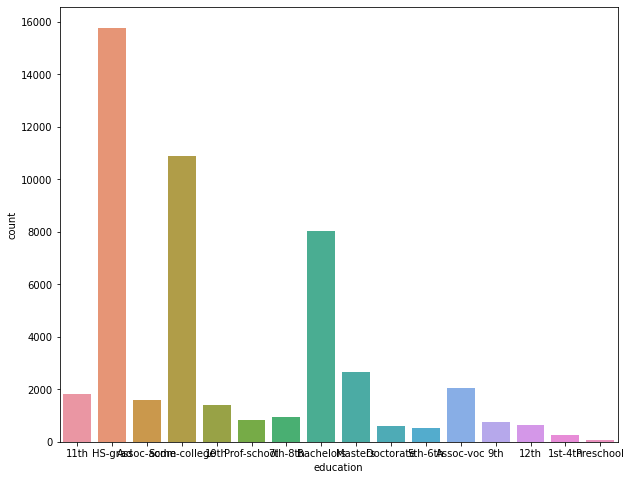

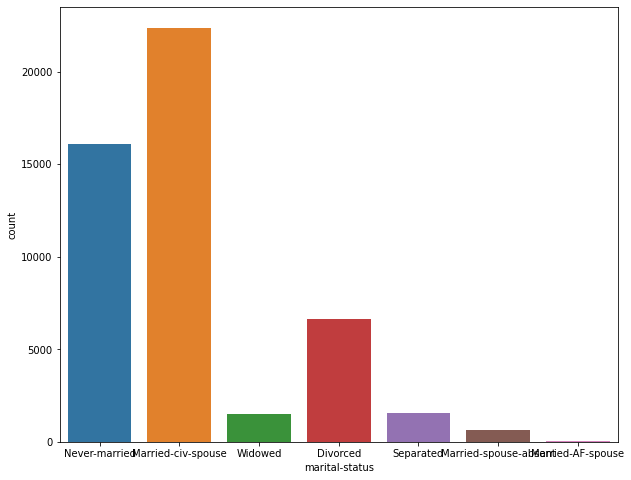

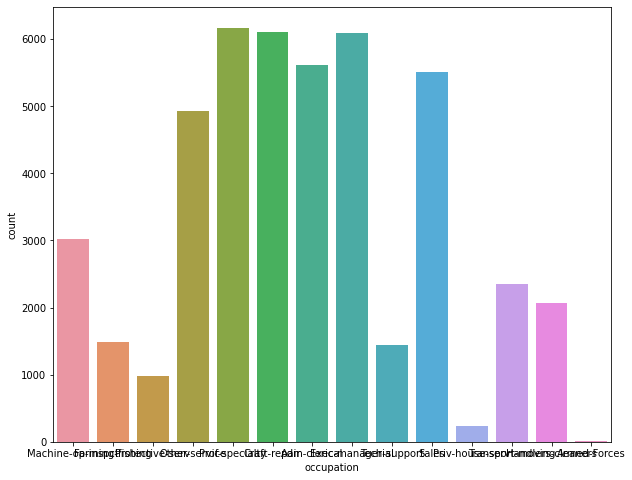

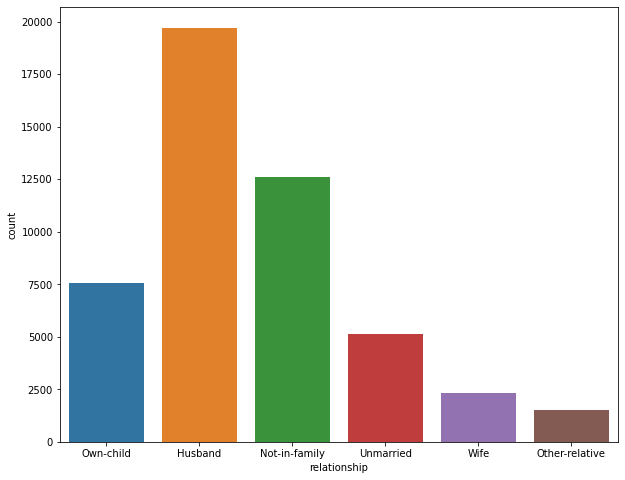

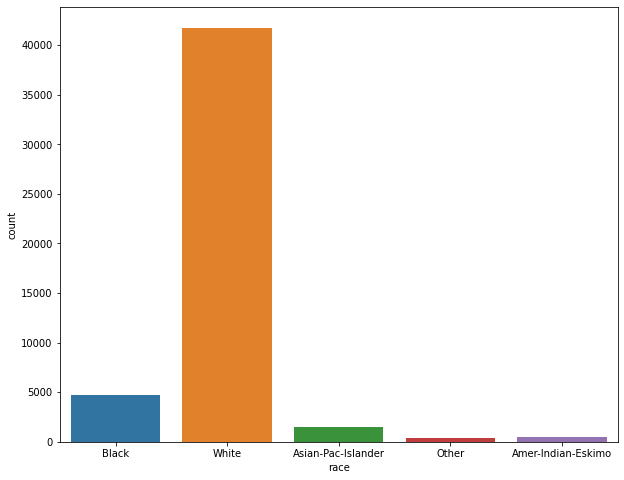

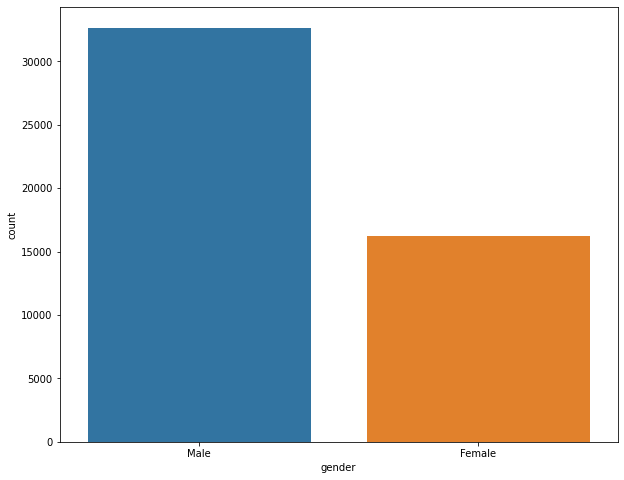

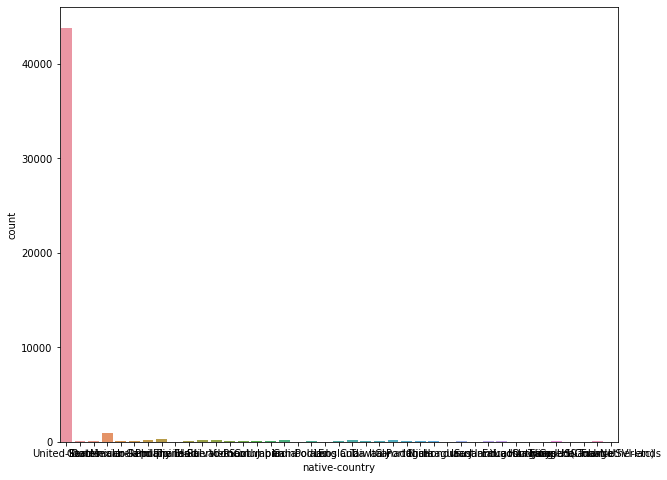

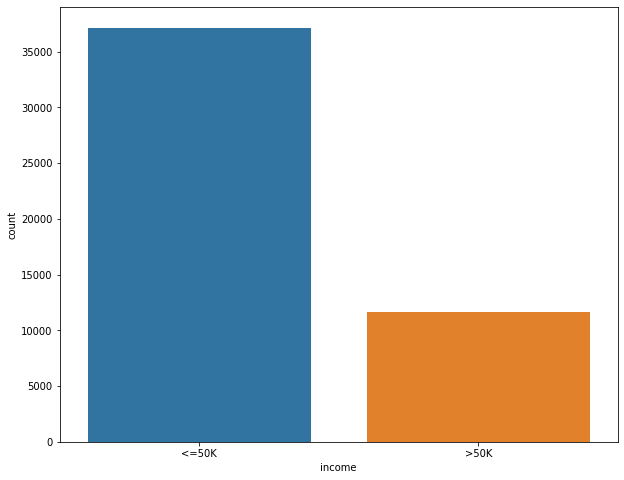

In [53]:
for i in cat_var:
    plt.figure(figsize=(10,8))
    sns.countplot(df[i])

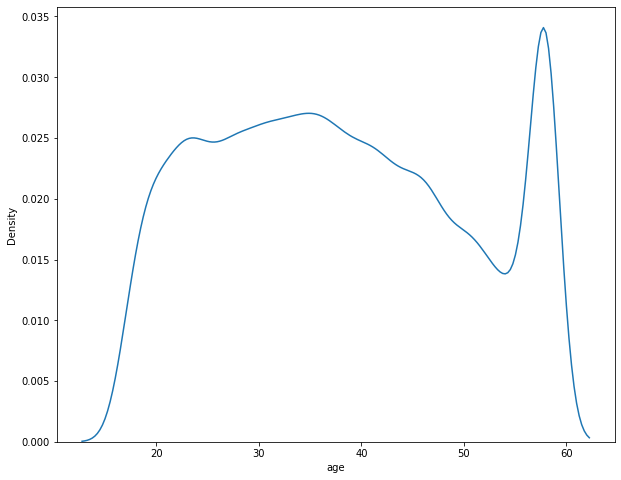

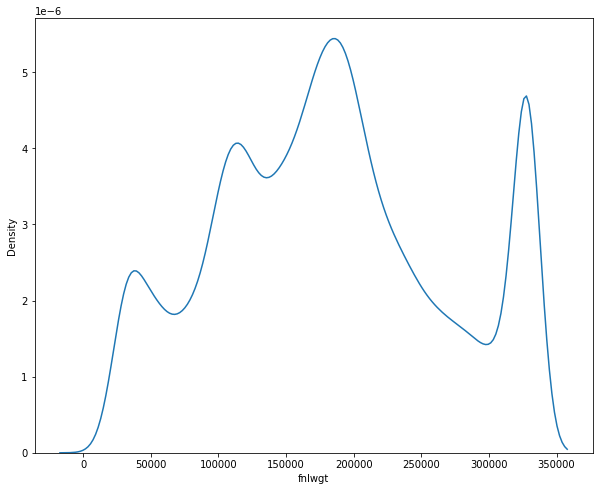

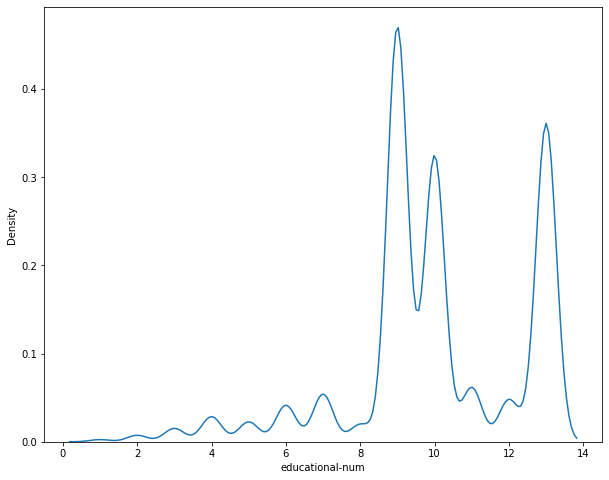

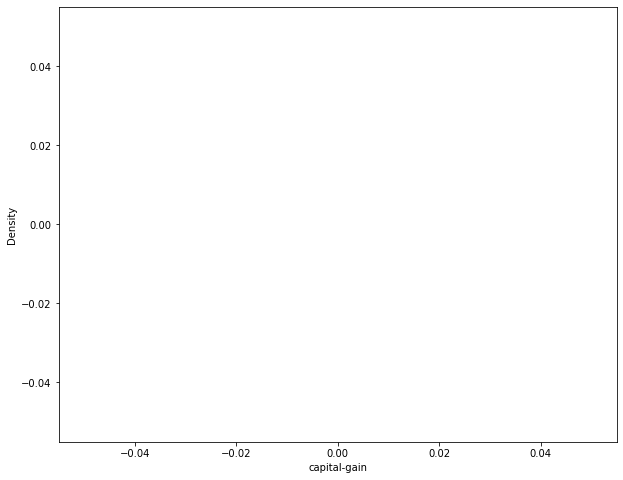

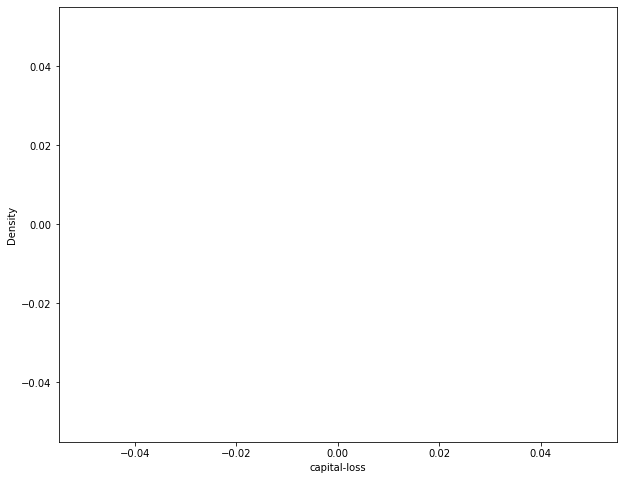

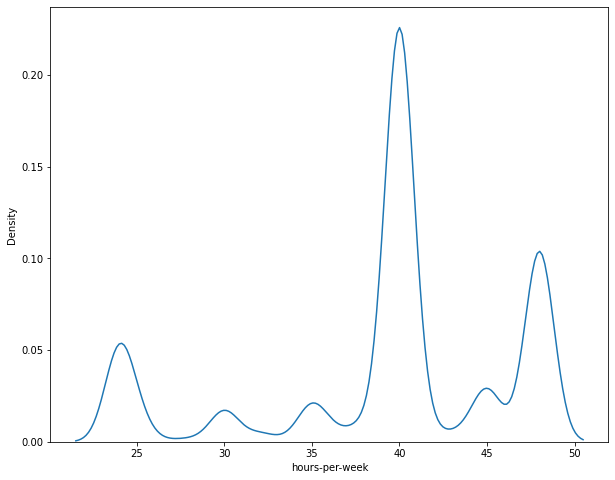

In [54]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.kdeplot(x=df[i])

# Bivariate Analysis:

# Scatter plots

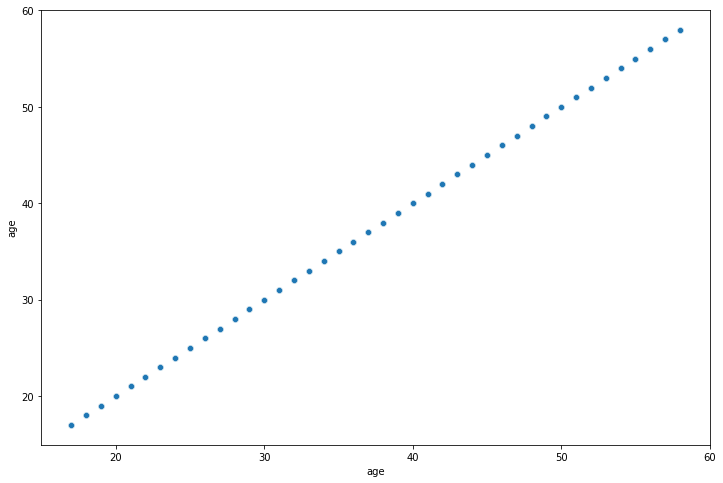

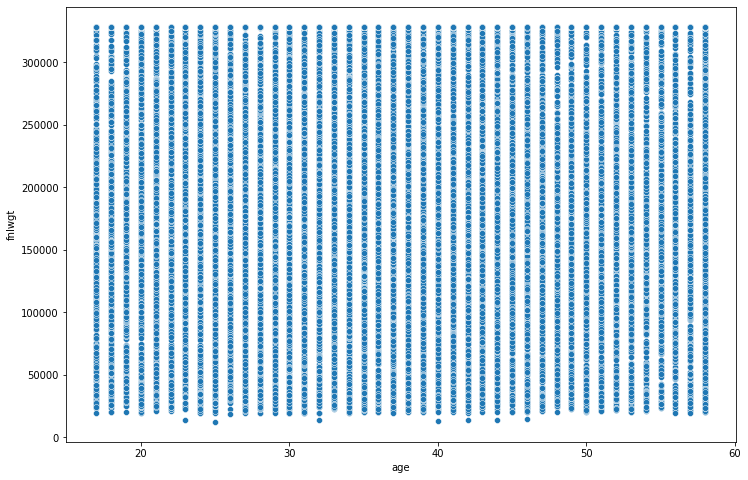

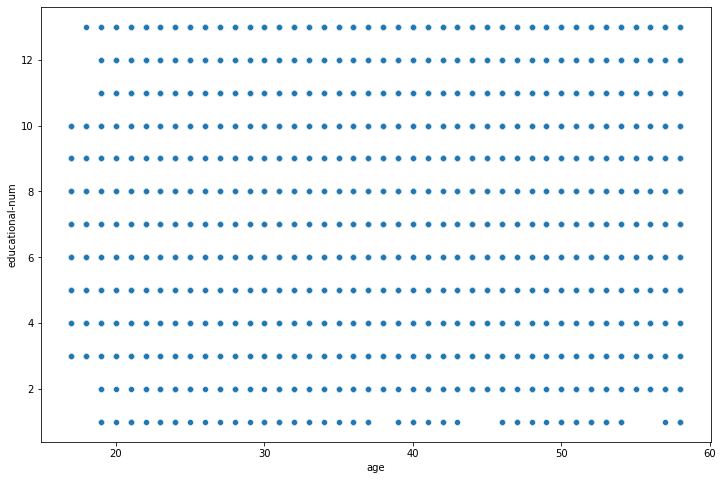

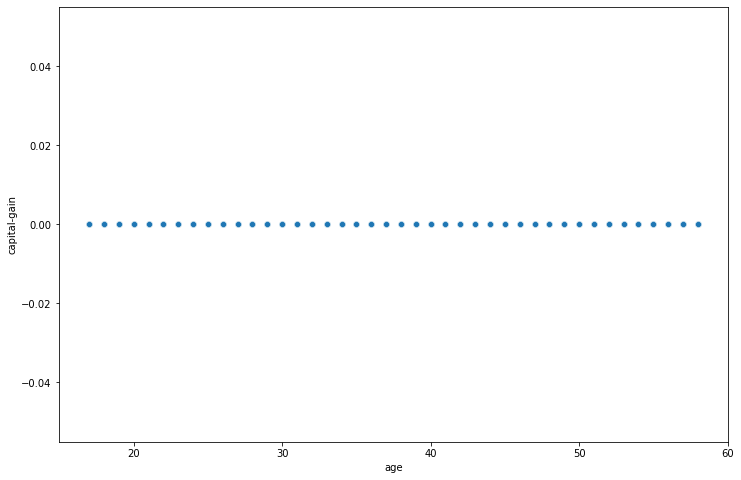

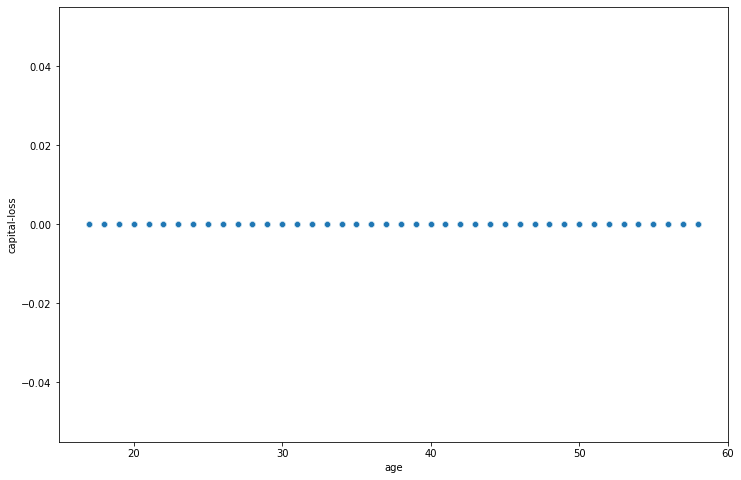

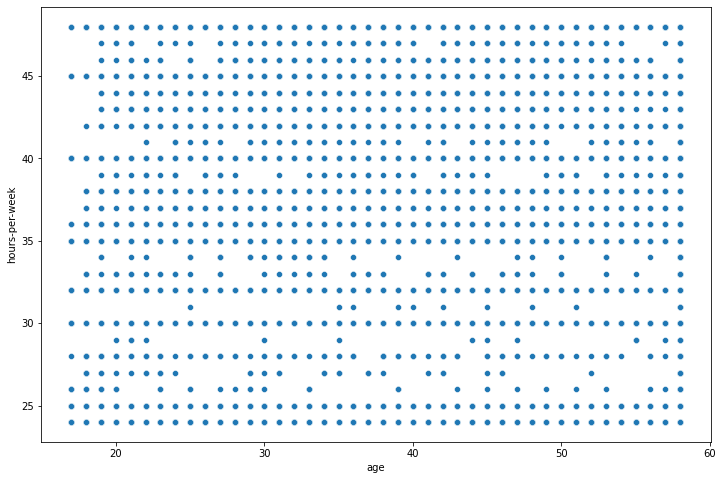

In [55]:
for i in num_var:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x="age",y=df[i],data=df)
    plt.show()

# Hexbin plots:

<Figure size 720x576 with 0 Axes>

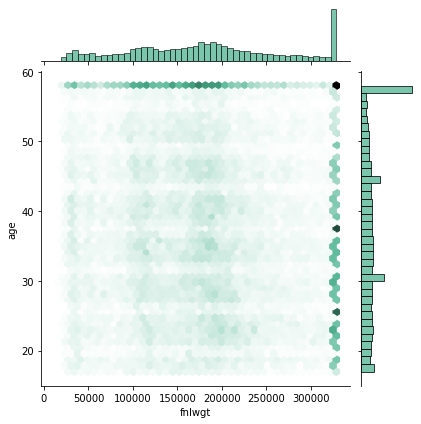

<Figure size 720x576 with 0 Axes>

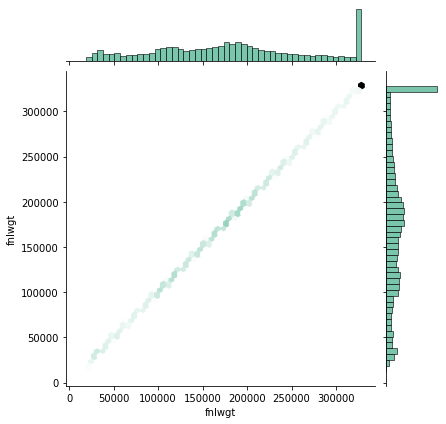

<Figure size 720x576 with 0 Axes>

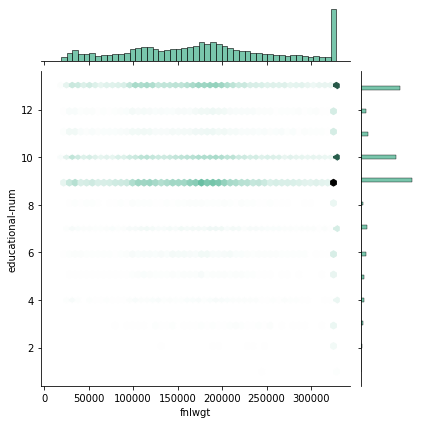

<Figure size 720x576 with 0 Axes>

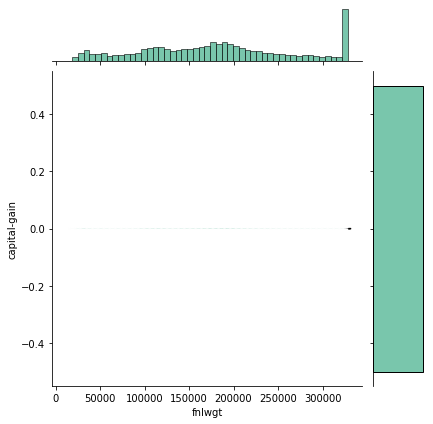

<Figure size 720x576 with 0 Axes>

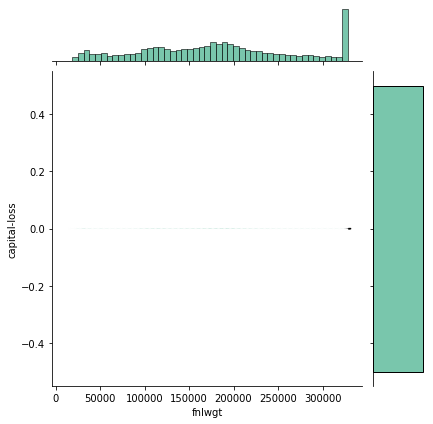

<Figure size 720x576 with 0 Axes>

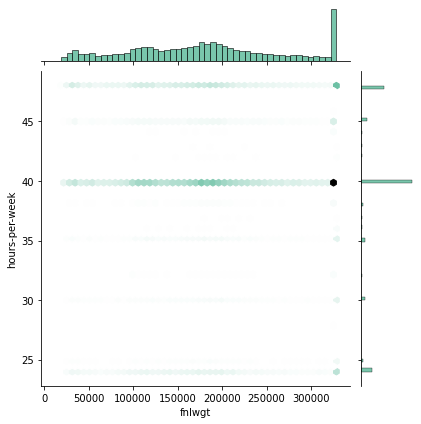

In [56]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.jointplot(data=df, x="fnlwgt", y=df[i], kind="hex",color="#4CB391")
    plt.show()

# Pairolpt

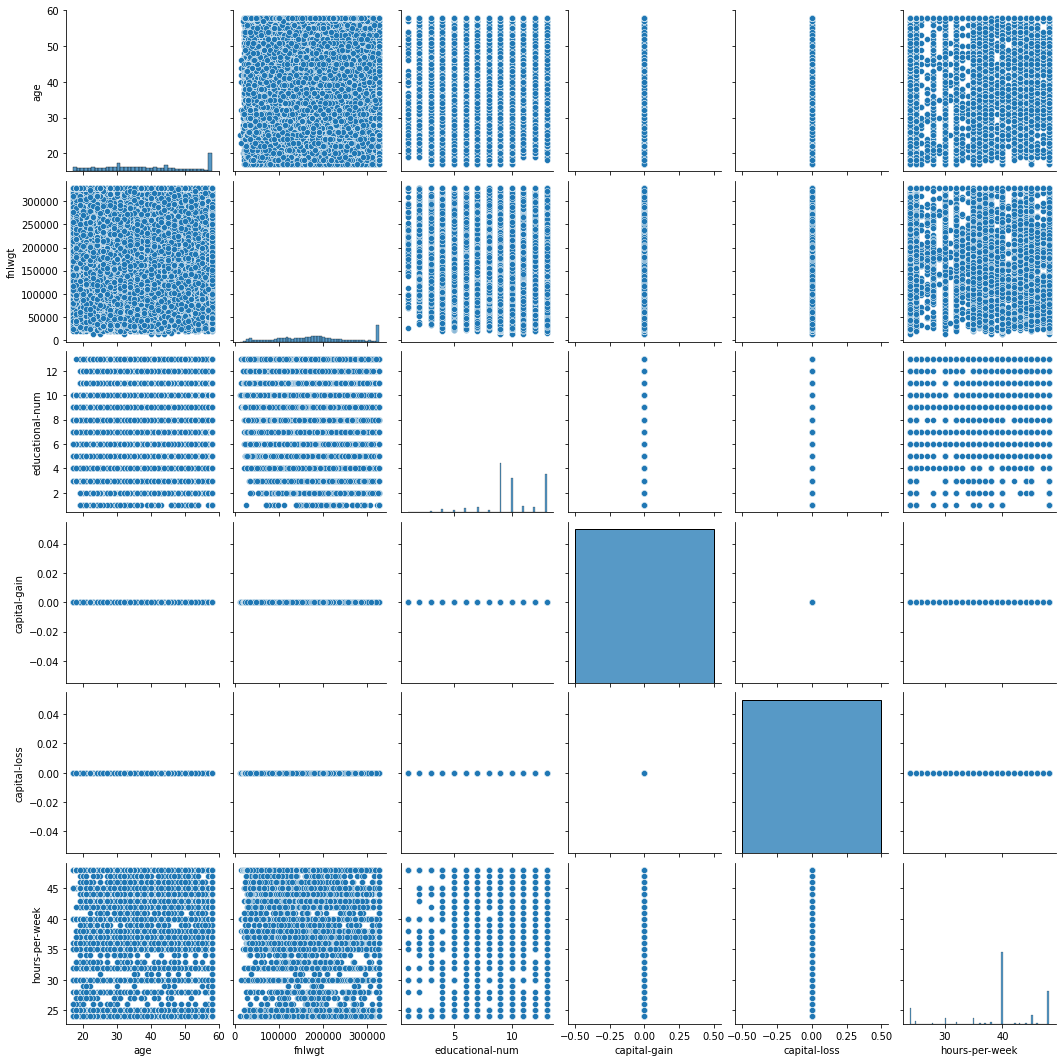

In [57]:
sns.pairplot(df)

# Box Plot:

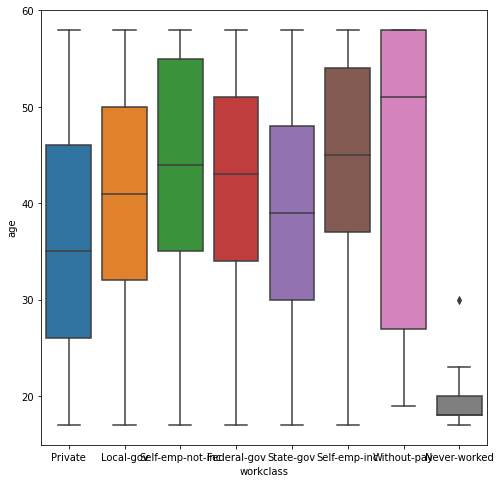

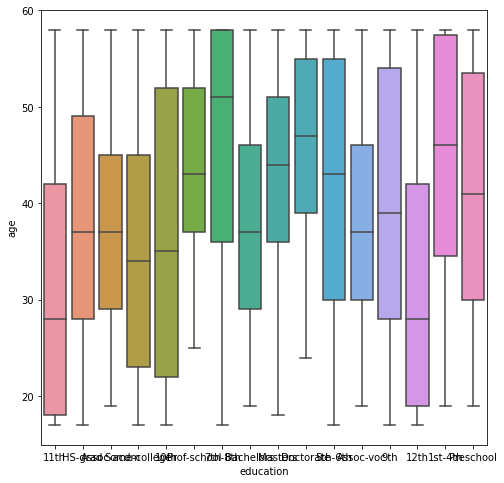

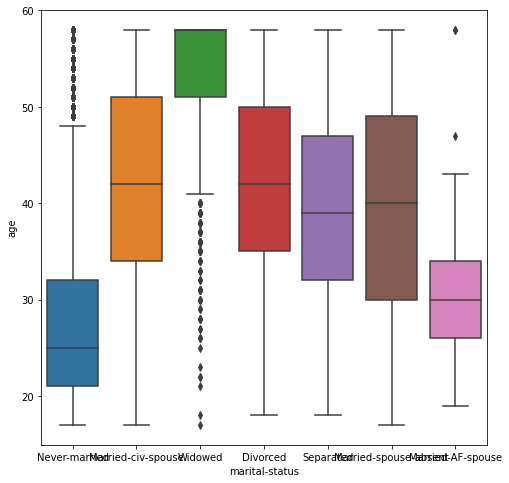

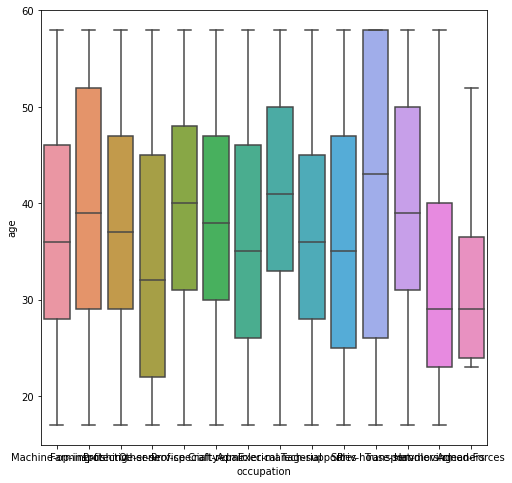

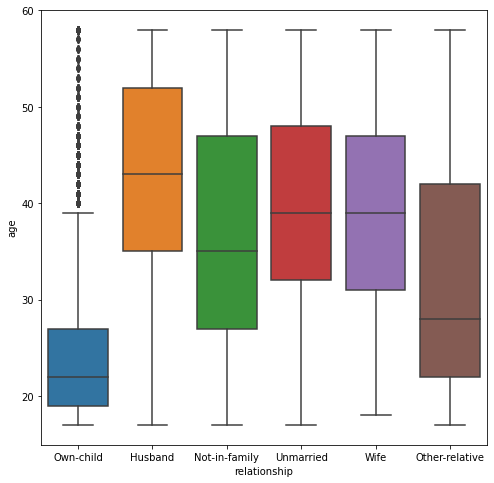

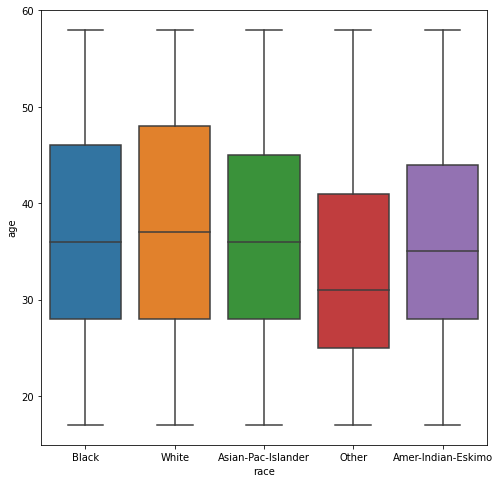

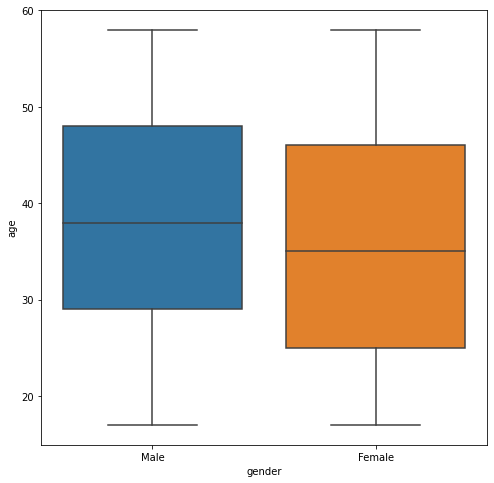

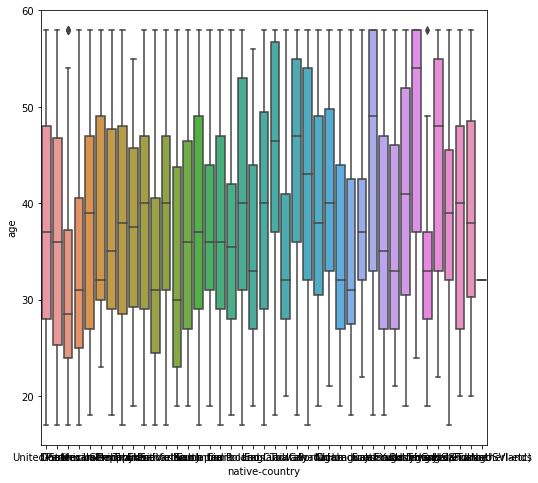

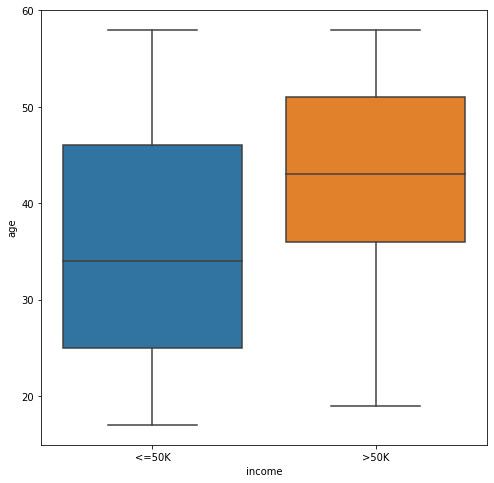

In [58]:
for i in cat_var:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=df[i], y='age',data=df)
    plt.show()

# Bar Plot:

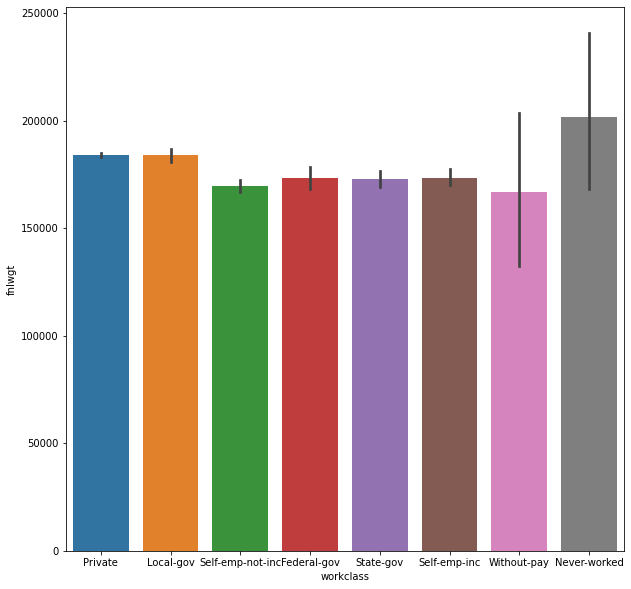

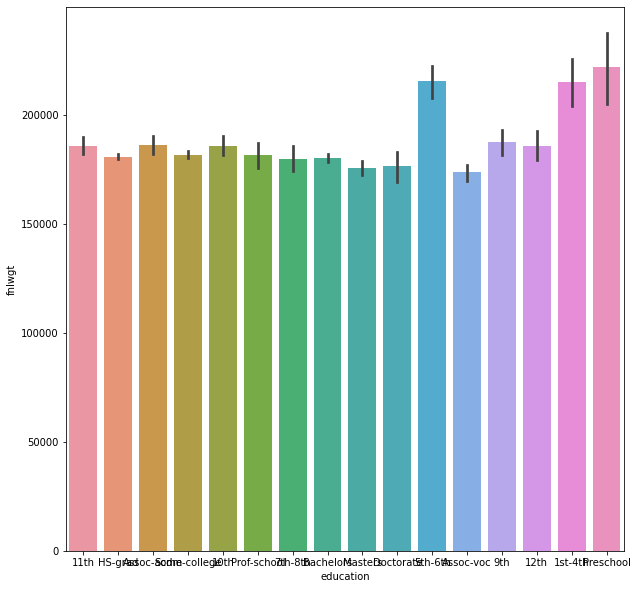

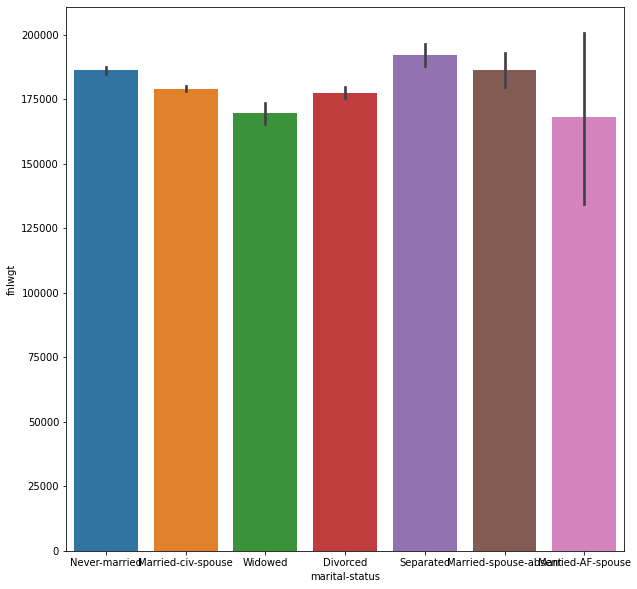

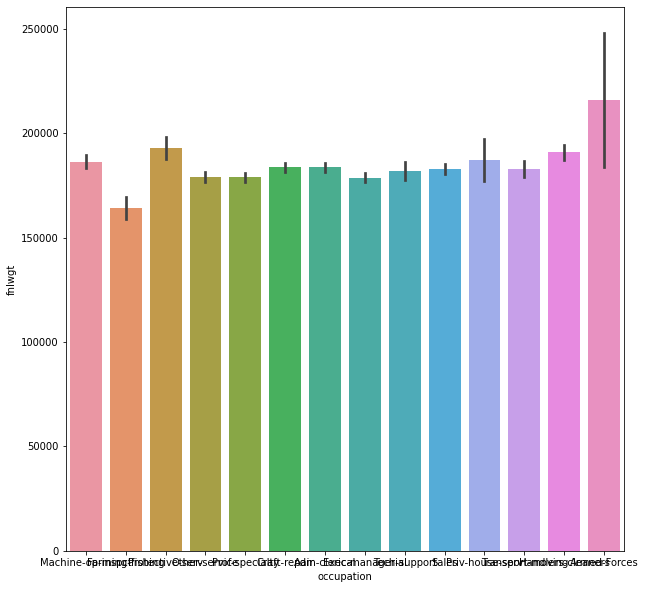

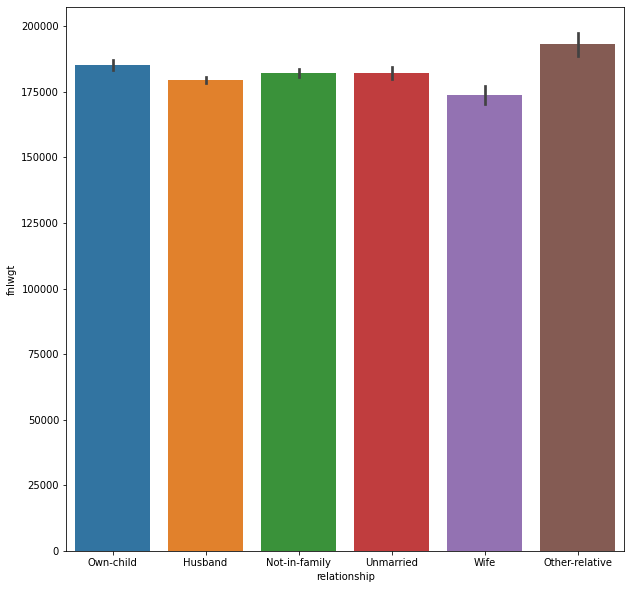

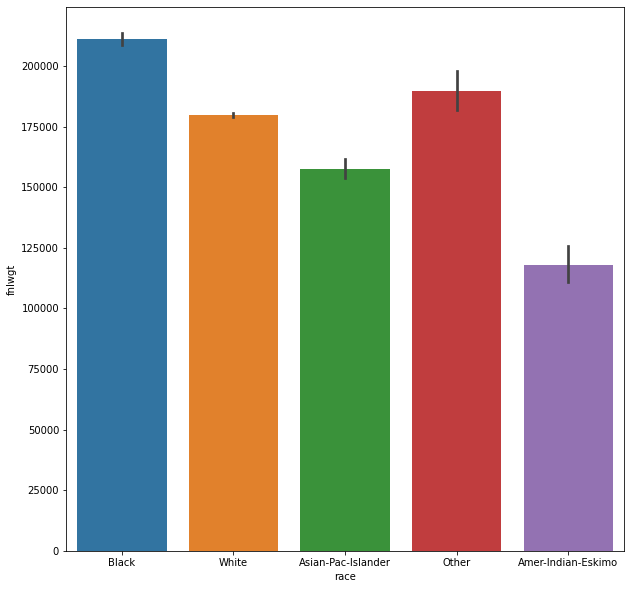

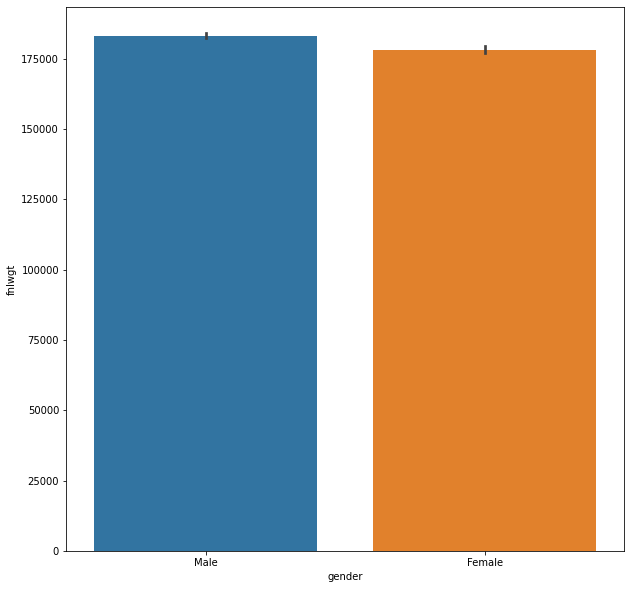

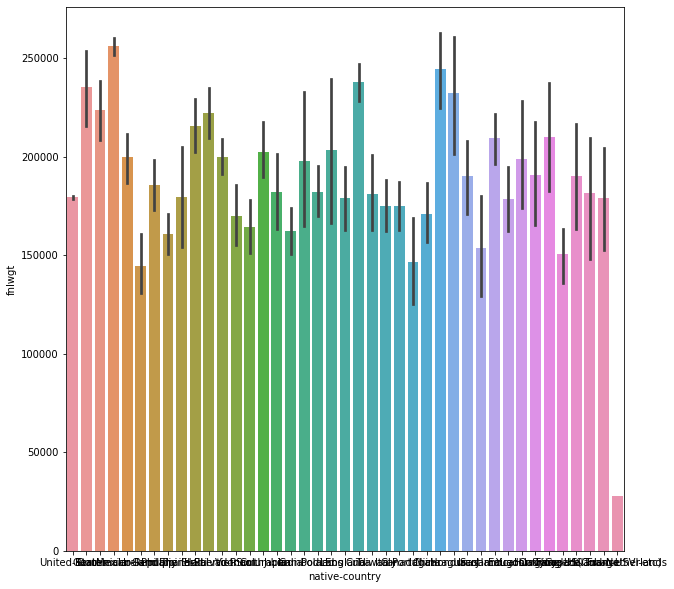

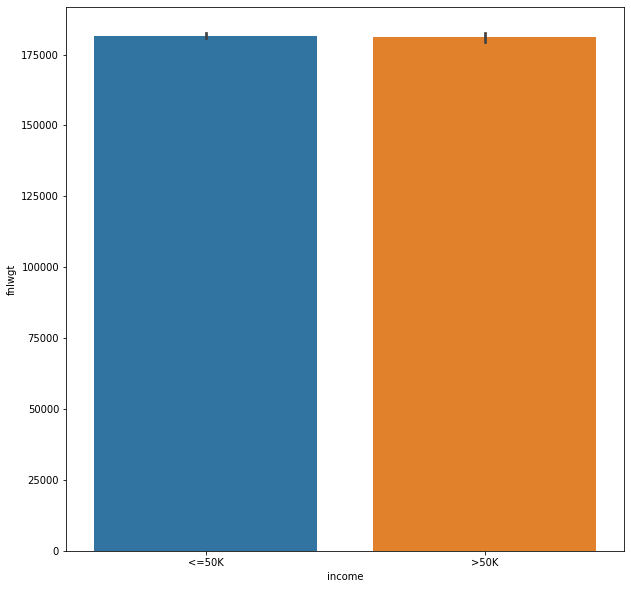

In [60]:
for i in cat_var:
    plt.figure(figsize=(10,10))
    sns.barplot(x=df[i], y='fnlwgt',data=df)
    plt.show()

# Strip Polt:

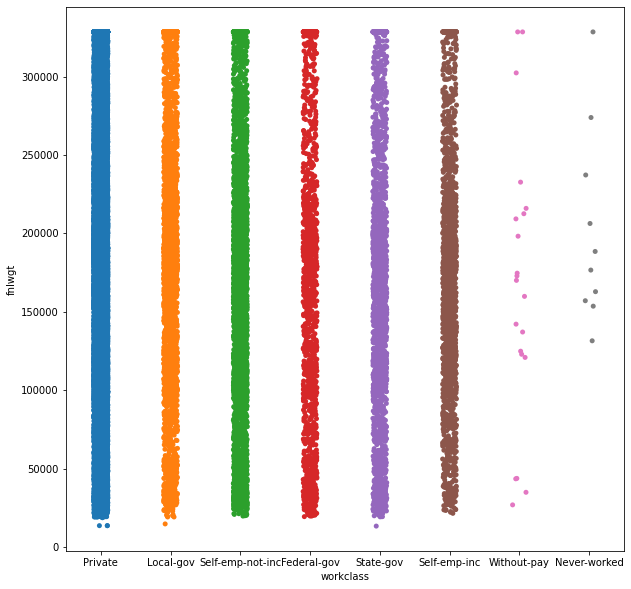

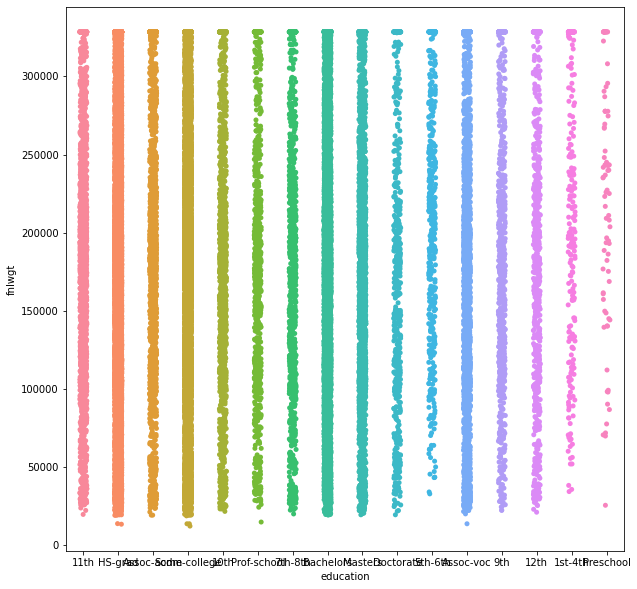

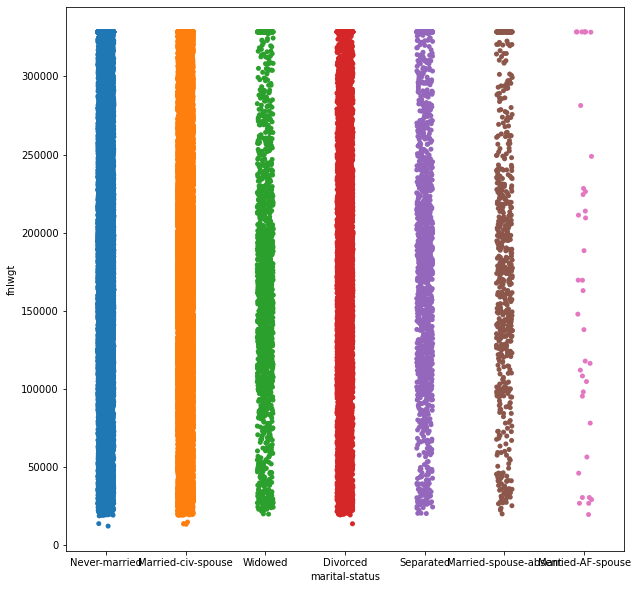

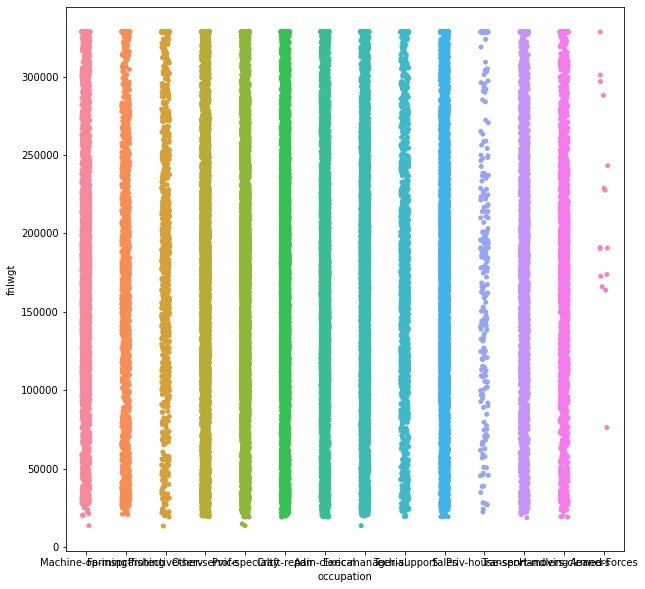

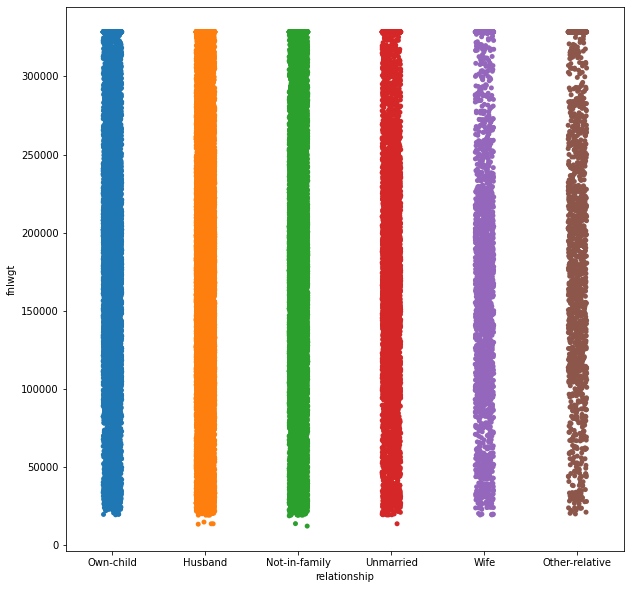

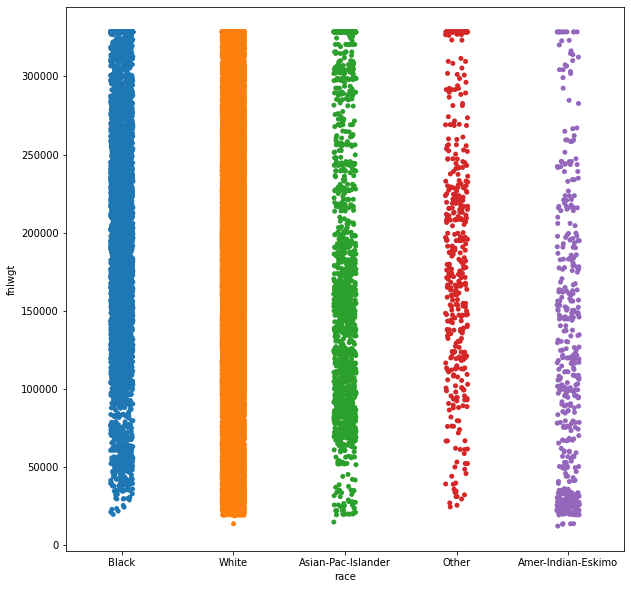

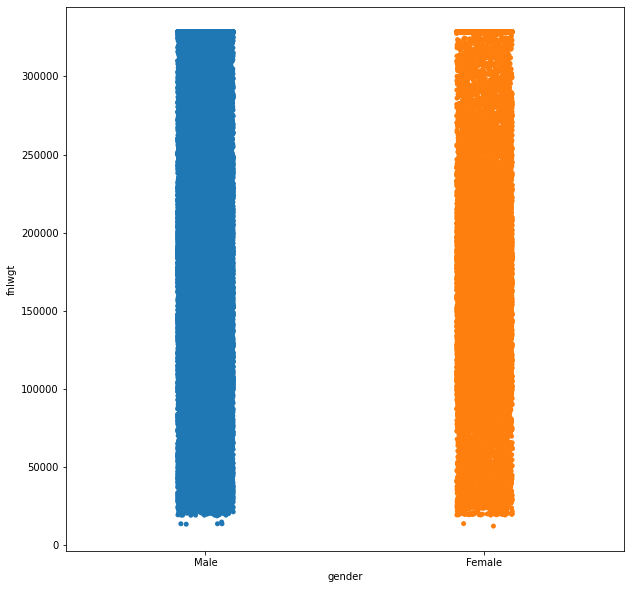

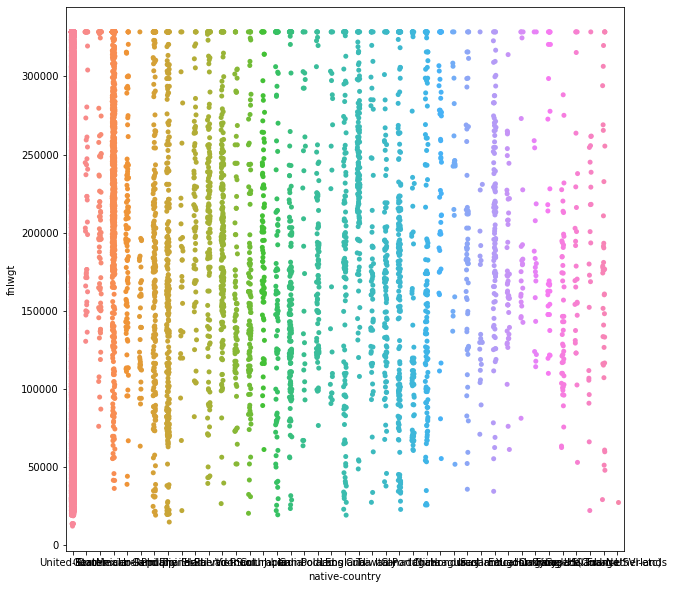

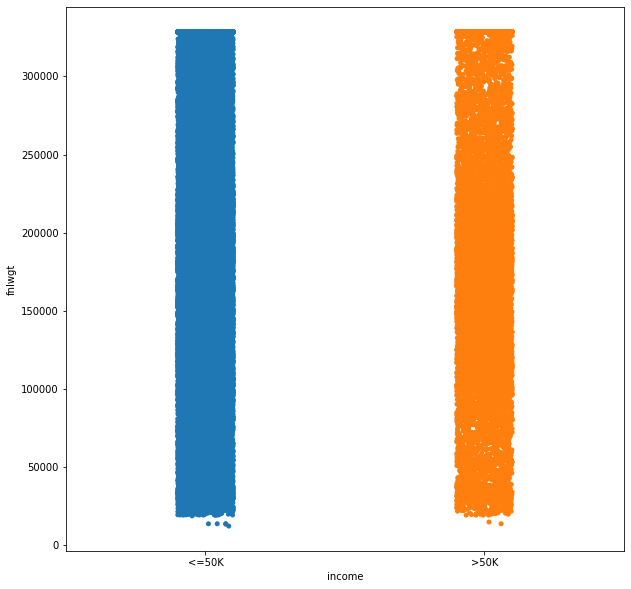

In [61]:
for i in cat_var:
    plt.figure(figsize=(10,10))
    sns.stripplot(x=df[i], y='fnlwgt',data=df)
    plt.show()

# Numerical Features Column For Standardization:

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [63]:
X=df[['fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']]
Y=df['age']

print(X.head)

<bound method NDFrame.head of        fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0      226802                7             0             0              40
1       89814                9             0             0              48
2      328466               12             0             0              40
3      160323               10             0             0              40
4      103497               10             0             0              30
...       ...              ...           ...           ...             ...
48837  257302               12             0             0              38
48838  154374                9             0             0              40
48839  151910                9             0             0              40
48840  201490                9             0             0              24
48841  287927                9             0             0              40

[48842 rows x 5 columns]>


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [65]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

In [66]:
num_cols=['fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [67]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

workclass         2799
occupation        2809
native-country     857
dtype: int64


In [68]:
X_train_stand

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
28636,-0.144781,1.282576,0.0,0.0,0.085184
2120,0.590854,-0.407293,0.0,0.0,0.085184
22863,-0.721161,0.015174,0.0,0.0,1.196499
32616,-1.809062,1.282576,0.0,0.0,0.779755
23456,-0.692587,-0.407293,0.0,0.0,1.057584
...,...,...,...,...,...
22635,-1.252132,0.437642,0.0,0.0,-2.137447
384,0.351871,-1.252228,0.0,0.0,1.196499
3808,1.508680,-0.407293,0.0,0.0,0.085184
5921,-1.748265,-0.407293,0.0,0.0,1.196499


In [69]:
X_test_stand

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
36629,0.157790,1.282576,0.0,0.0,0.085184
29111,0.236376,1.282576,0.0,0.0,1.196499
33469,0.116171,-1.674695,0.0,0.0,-2.137447
14428,-0.329561,0.015174,0.0,0.0,0.085184
39539,-0.916961,-0.407293,0.0,0.0,1.196499
...,...,...,...,...,...
47770,0.563965,0.437642,0.0,0.0,-0.470474
13518,1.732371,-2.942097,0.0,0.0,0.779755
46256,-0.377949,1.282576,0.0,0.0,1.196499
8445,-0.623302,-1.252228,0.0,0.0,0.085184


# Using Dummy variables For Categorica:

In [70]:
df["gender"] = df.gender.map({'Male':1,'Female':0})

In [71]:
df["race"] = df.race.map({'Black':1,'White':0})

In [72]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,1.0,1,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,0.0,1,0,0,48,United-States,<=50K
2,28,Local-gov,328466,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,0.0,1,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,1.0,1,0,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,0.0,0,0,0,30,United-States,<=50K


In [73]:
pd.get_dummies(df,columns=["race","gender",])

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,race_0.0,race_1.0,gender_0,gender_1
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,0,0,40,United-States,<=50K,0,1,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,0,0,48,United-States,<=50K,1,0,0,1
2,28,Local-gov,328466,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,0,0,40,United-States,>50K,1,0,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K,0,1,0,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,0,0,30,United-States,<=50K,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K,1,0,1,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K,1,0,0,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K,1,0,1,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,24,United-States,<=50K,1,0,0,1


In [74]:
df.gender.head()

0    1
1    1
2    1
3    1
4    0
Name: gender, dtype: int64

# Prove Central Limit Theorem on ‘age’: 

In [75]:
from scipy.stats import norm 
age=np.array(df.age)

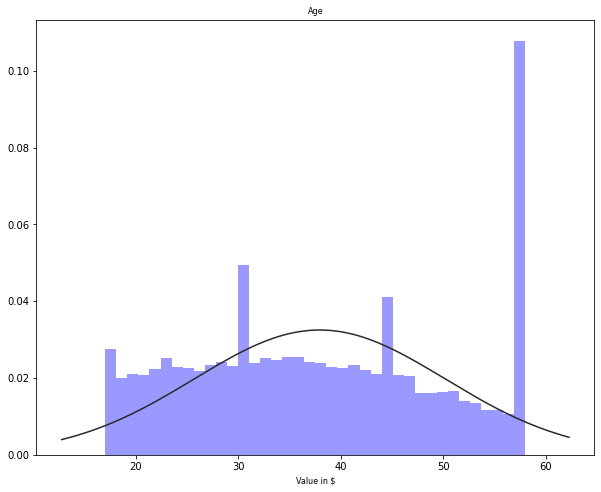

In [76]:
plt.figure(figsize=(10, 8))
plt.title('Age', size=8)
plt.xlabel('Value in $', size=8)
sns.distplot(age, fit=norm, color='blue', kde=False)

In [77]:
sample_num = 1000
sample_size = 30

mean_sample_values = []

for i in range(sample_num):
    sample_mean = np.mean(np.random.choice(age, sample_size, replace=True))
    mean_sample_values.append(sample_mean) 

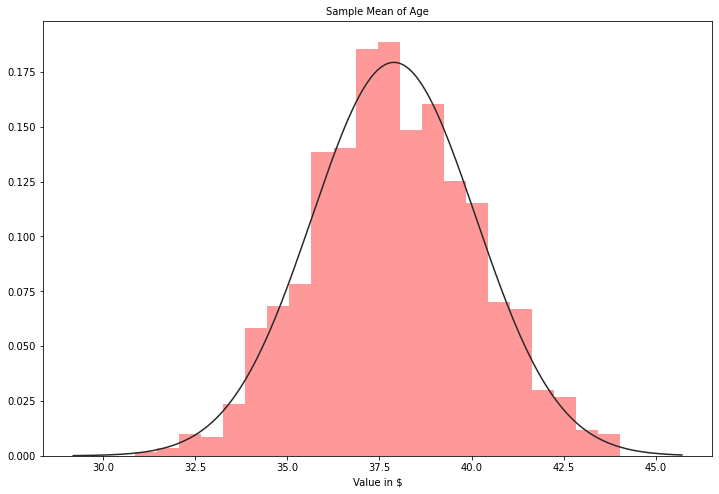

In [78]:
plt.figure(figsize=(12, 8))
plt.title('Sample Mean of Age', size=10)
plt.xlabel('Value in $', size=10)
sns.distplot(mean_sample_values, fit=norm, color='red', kde=False)

Plotting the sample means distribution, which approaches a normal distribution. As we can see, the central limit theorem is indeed true

# Chi Square Test For Relationship between Occupation and gender:

In [79]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [80]:
df.gender.value_counts()

1    32650
0    16192
Name: gender, dtype: int64

In [81]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [82]:
pd.crosstab(df.occupation, df.gender, margins=True)

gender,0,1,All
occupation,,,
Adm-clerical,3769,1842,5611
Armed-Forces,0,15,15
Craft-repair,323,5789,6112
Exec-managerial,1748,4338,6086
Farming-fishing,95,1395,1490
Handlers-cleaners,254,1818,2072
Machine-op-inspct,804,2218,3022
Other-service,2698,2225,4923
Priv-house-serv,228,14,242


In [83]:
observed = pd.crosstab(df.occupation,df.gender)
observed

gender,0,1
occupation,,
Adm-clerical,3769,1842
Armed-Forces,0,15
Craft-repair,323,5789
Exec-managerial,1748,4338
Farming-fishing,95,1395
Handlers-cleaners,254,1818
Machine-op-inspct,804,2218
Other-service,2698,2225
Priv-house-serv,228,14


In [84]:
chi2_contingency(observed)

(8690.69415082913, 0.0, 13, array([[1818.48910564, 3792.51089436],
        [   4.86140378,   10.13859622],
        [1980.85999175, 4131.14000825],
        [1972.43355853, 4113.56644147],
        [ 482.8994417 , 1007.1005583 ],
        [ 671.5219082 , 1400.4780918 ],
        [ 979.41081398, 2042.58918602],
        [1595.51271914, 3327.48728086],
        [  78.43064758,  163.56935242],
        [2000.30560685, 4171.69439315],
        [ 318.58399409,  664.41600591],
        [1783.81109204, 3720.18890796],
        [ 468.63932396,  977.36067604],
        [ 763.24039276, 1591.75960724]]))

In [85]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [86]:
alpha = 1 - 0.90

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

19.81192930712756

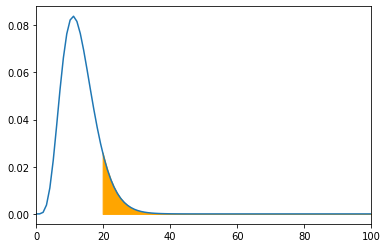

In [87]:
x_min = 0
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='orange')

In [88]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [90]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis
